In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
import resource
import numpy as np
from skimage import img_as_bool, io, color

soft, hard = resource.getrlimit(resource.RLIMIT_NOFILE)
resource.setrlimit(resource.RLIMIT_NOFILE, (hard, hard))

thickTrainDir = "data/train/thick/"
thinTrainDir = "data/train/thin/"
thickValDir = "data/validation/thick/"
thinValDir = "data/validation/thin/"

X_train = []
y_train = []
X_val = []
y_val = []

#thickImgs = os.listdir(thickTrainDir)
#for thickImg in thickImgs:
#    imgPath = thickTrainDir + thickImg
#    if not os.path.isdir(imgPath) :
#        x = load_img(imgPath)
#        x = img_as_bool(color.rgb2gray(io.imread(imgPath)))
#        x_train.append(x)

#x_train = np.array(x_train)

def appendImgs(imglist, labels, directory):
    imgs = os.listdir(directory)
    for img in imgs:
        imgPath = directory + img
        if not os.path.isdir(imgPath) :
            x = load_img(imgPath)
            x = img_as_bool(color.rgb2gray(io.imread(imgPath)))
            imglist.append(x)
            if 'thick' in imgPath:
                labels.append(1)
            elif 'thin' in imgPath:
                labels.append(0)

appendImgs(X_train, y_train, thickTrainDir)
appendImgs(X_train, y_train, thinTrainDir)

appendImgs(X_val, y_val, thickValDir)
appendImgs(X_val, y_val, thinValDir)

X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

X_train.shape



#train_thick =   

# create generator
#datagen = ImageDataGenerator()

Using TensorFlow backend.
/home/aalejo/.conda/envs/ia2/lib/python3.7/site-packages/skimage/util/dtype.py:131: UserWarning: Possible sign loss when converting negative image of type float64 to positive image of type bool.
  .format(dtypeobj_in, dtypeobj_out))
/home/aalejo/.conda/envs/ia2/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to bool
  .format(dtypeobj_in, dtypeobj_out))


(2, 256, 256)

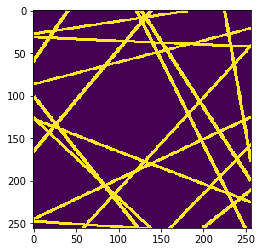

In [3]:
import matplotlib.pyplot as plt

plt.imshow(X_train[-1])
plt.show()

In [4]:
#train_it = datagen.flow_from_directory('data/train/', class_mode='binary')
#val_it = datagen.flow_from_directory('data/validation/', class_mode='binary')

#train_it

#import matplotlib.pyplot as plt

#plt.imshow(train_it[0], cmap='gray', vmin=0, vmax=255)
#plt.show()


#batchX, batchy = train_it.next()
#print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

NameError: name 'train_it' is not defined

In [4]:
import keras
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import tensorflow as tf

#bs = 32
#epochs = 10
#lr = 0.001

#model = Sequential()
#model.add(Flatten(input_shape=X_train[0].shape))
#model.add(Dense(128, activation='relu'))
#model.add(Dense(2, activation='softmax'))
#model.compile(optimizer=SGD(lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.summary()

X_train = X_train.reshape(X_train.shape[0], 256, 256, 1)
X_val = X_val.reshape(X_val.shape[0], 256, 256, 1)
input_shape = (256, 256, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation=tf.nn.relu, input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(2,activation=tf.nn.softmax))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
metrics=['accuracy'])

model.summary()


##model building
#model = Sequential()
#convolutional layer with rectified linear unit activation
#model.add(Conv2D(32, kernel_size=(3, 3),
                 #activation='relu',
                 #input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
#model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
#model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
#model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
#model.add(Flatten())
#fully connected to get all relevant data
#model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
#model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
#model.add(Dense(num_category, activation='softmax'))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 516128)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               66064512  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total params: 66,065,090
Trainable params: 66,065,090
Non-trainable params: 0
__________________________________________

In [5]:
# log = model.fit(X_train, y_train, batch_size=bs, epochs=epochs, validation_data=[X_val, y_val])
log = model.fit(x=X_train,y=y_train, batch_size=128, epochs=100, validation_data=(X_val, y_val))

Train on 2 samples, validate on 2 samples
Epoch 1/100
2/2 [==============================] - 1s 707ms/step - loss: 0.6734 - accuracy: 1.0000 - val_loss: 1.0487 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 1s 592ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.6079 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 1s 632ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.0760 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 1s 585ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.4740 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 1s 590ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.8187 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 1s 594ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.1200 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 1s 597ms/step - loss: 0.0000e+00 - accura

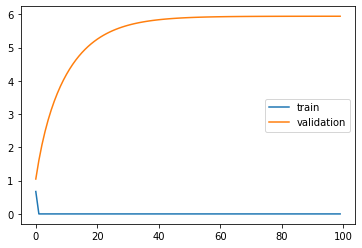

In [6]:
plt.plot(log.history['loss'], label='train')
plt.plot(log.history['val_loss'], label='validation')
plt.legend()